# Exploring the filtered fonts

In [7]:
# forcing the notebook to reload the modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
sys.path.append('../')

In [9]:
from src.data import datarenderer
import os
import numpy as np
from src.data import fontdb_handler as fh

In [21]:
PATH_JSON_FONT_DB = '../data/raw/00dataset.json'
path_list = fh.font_file_list(PATH_JSON_FONT_DB) # List with all the paths to the fonts
len(path_list)

24805

In [20]:
# path = os.path.join(os.pardir, "data", "processed", "filtered-fonts")
# font_file_names = os.listdir(path)
# len(font_file_names)

..\data\raw\GoogleFontsDB
['.git', 'apache', 'ofl', 'ufl']


24805

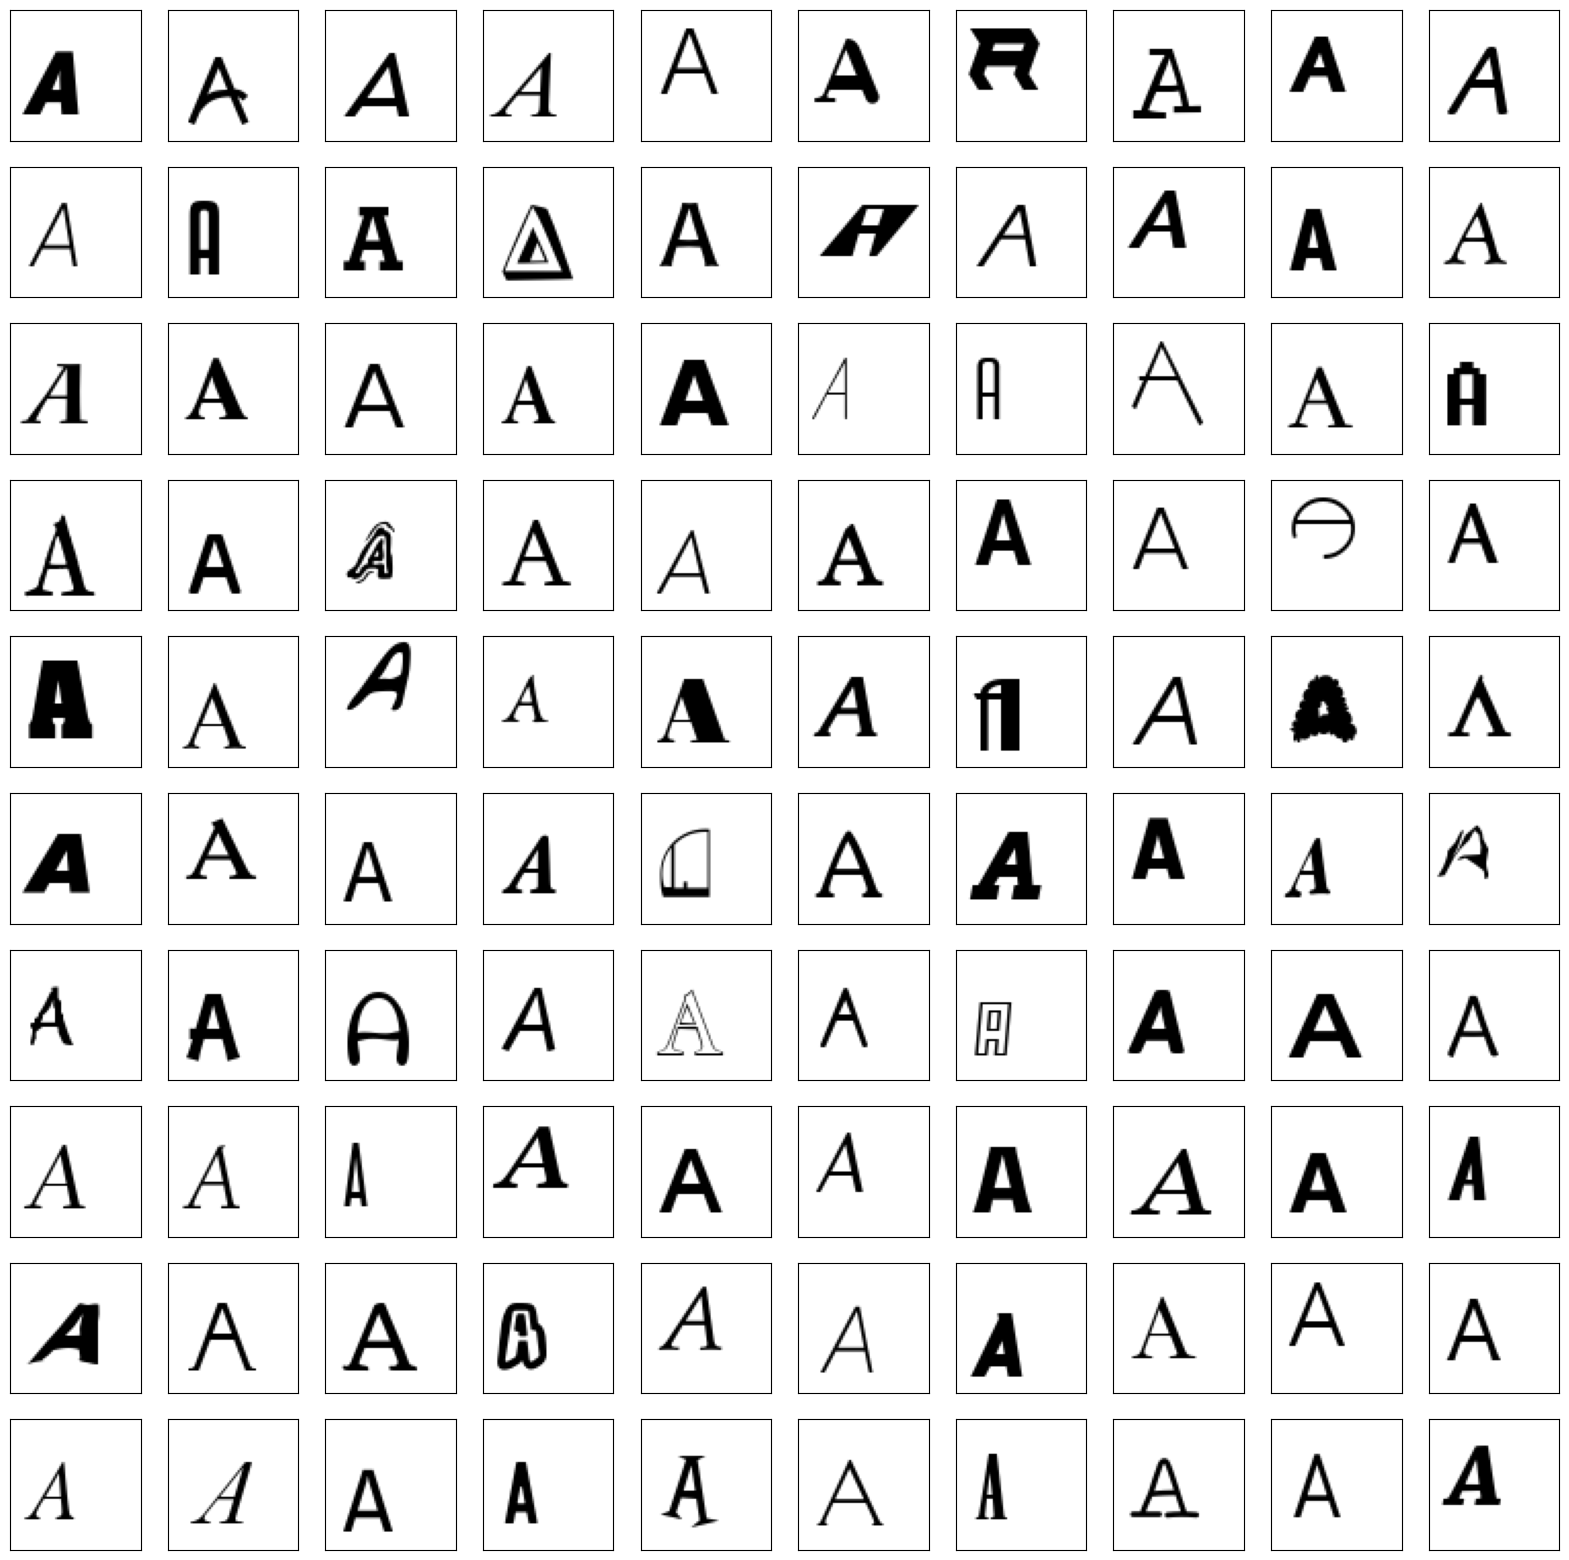

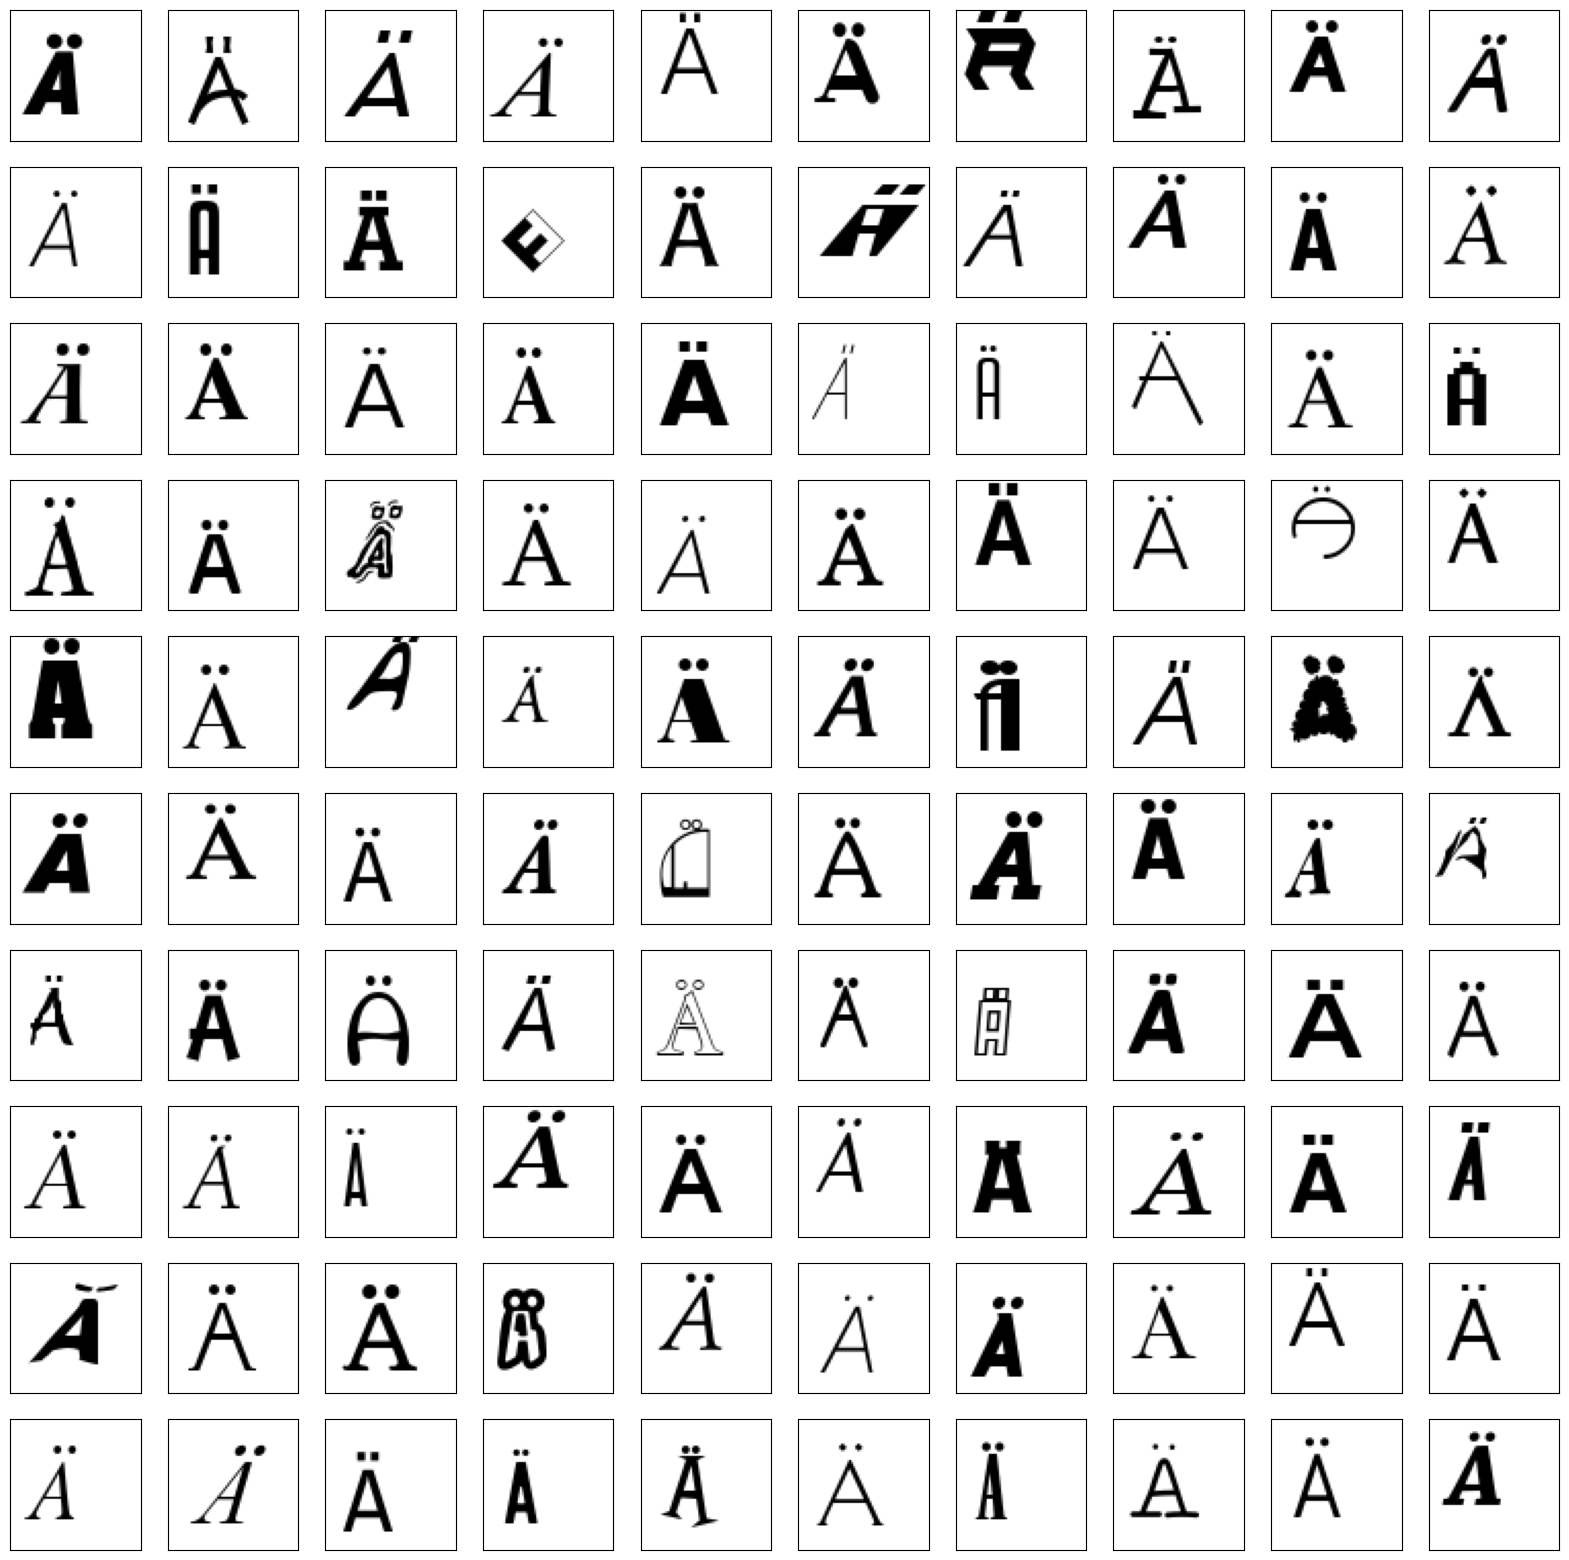

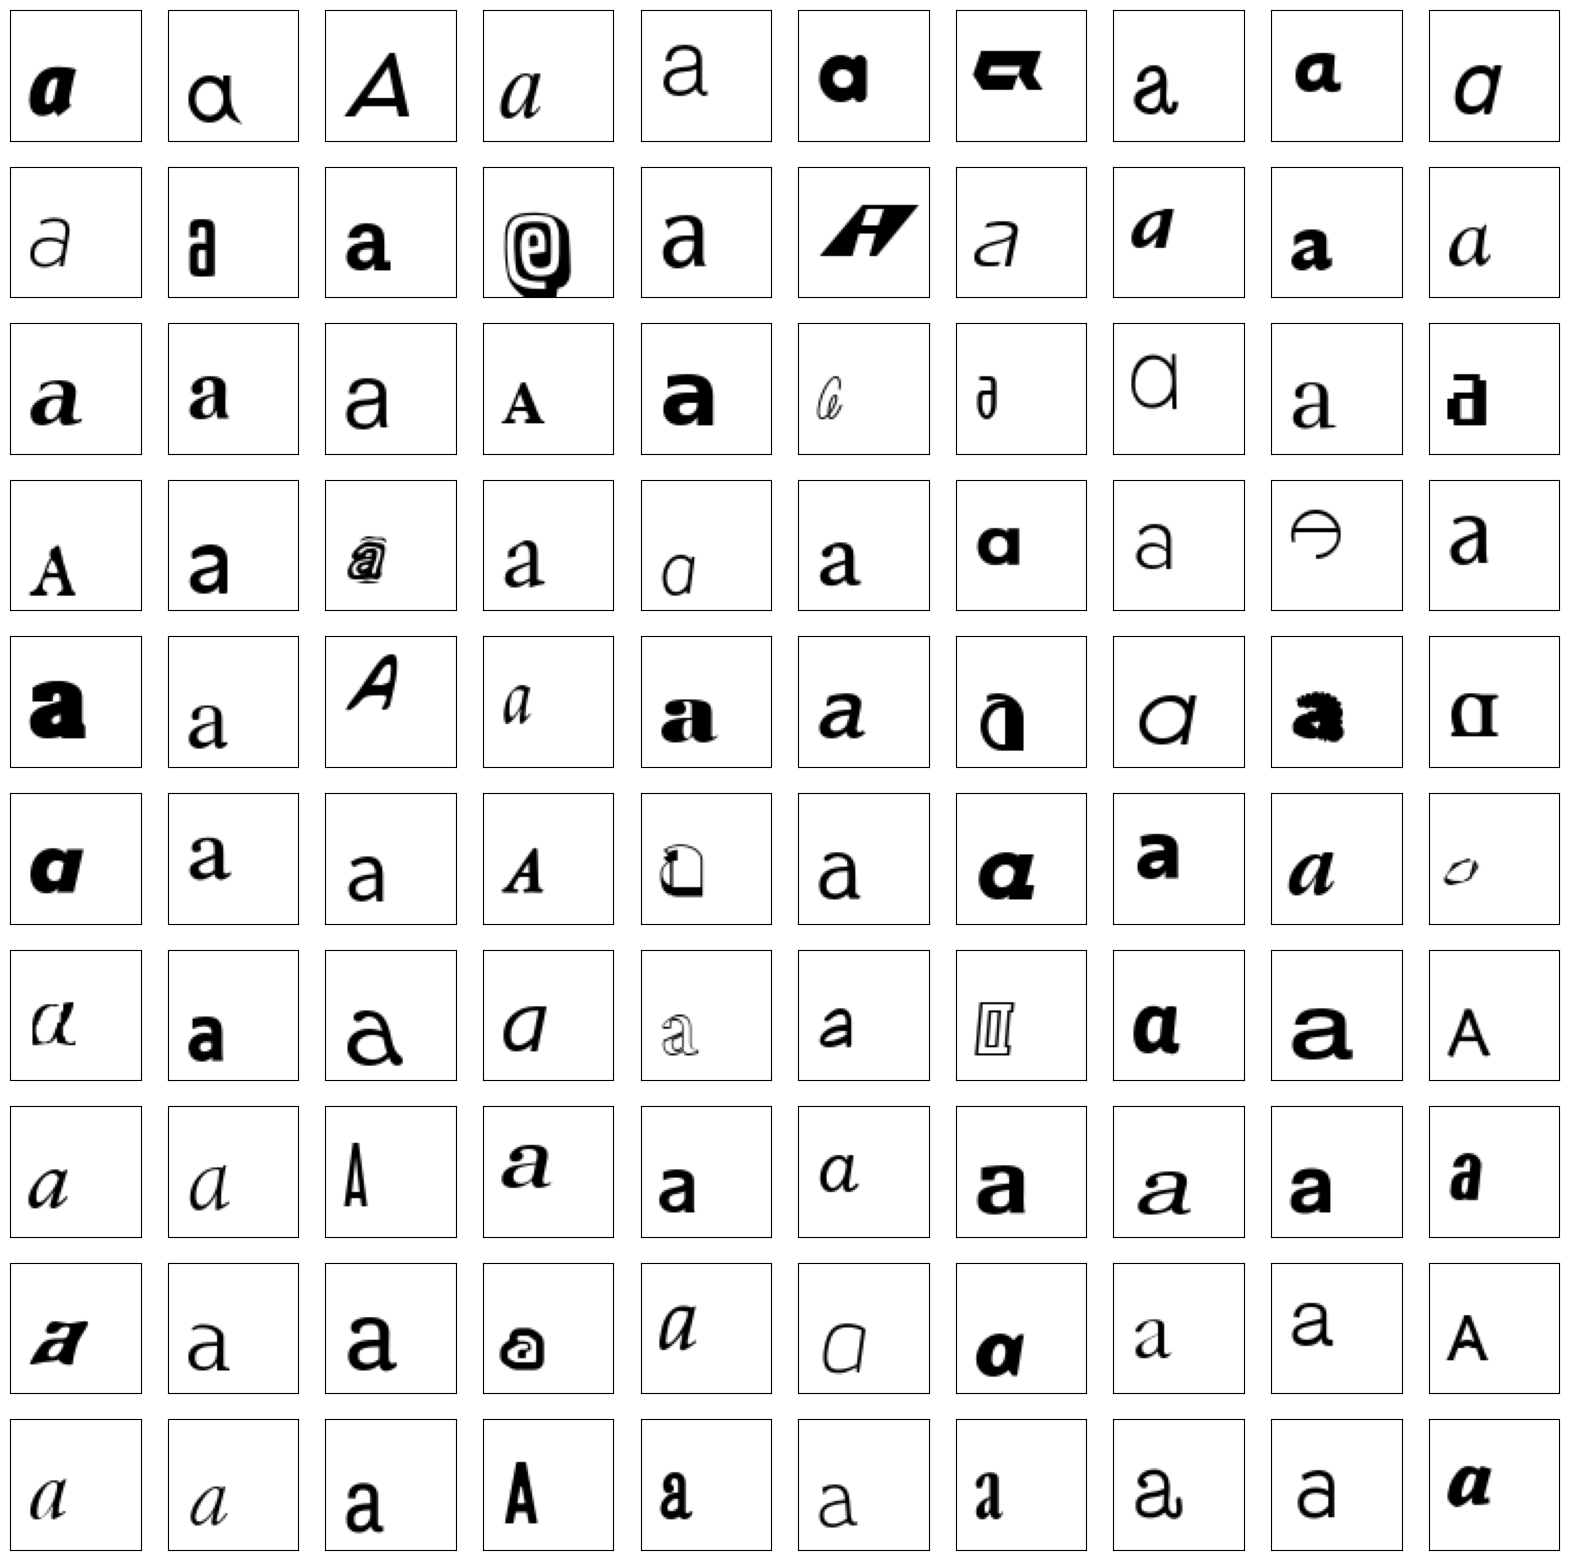

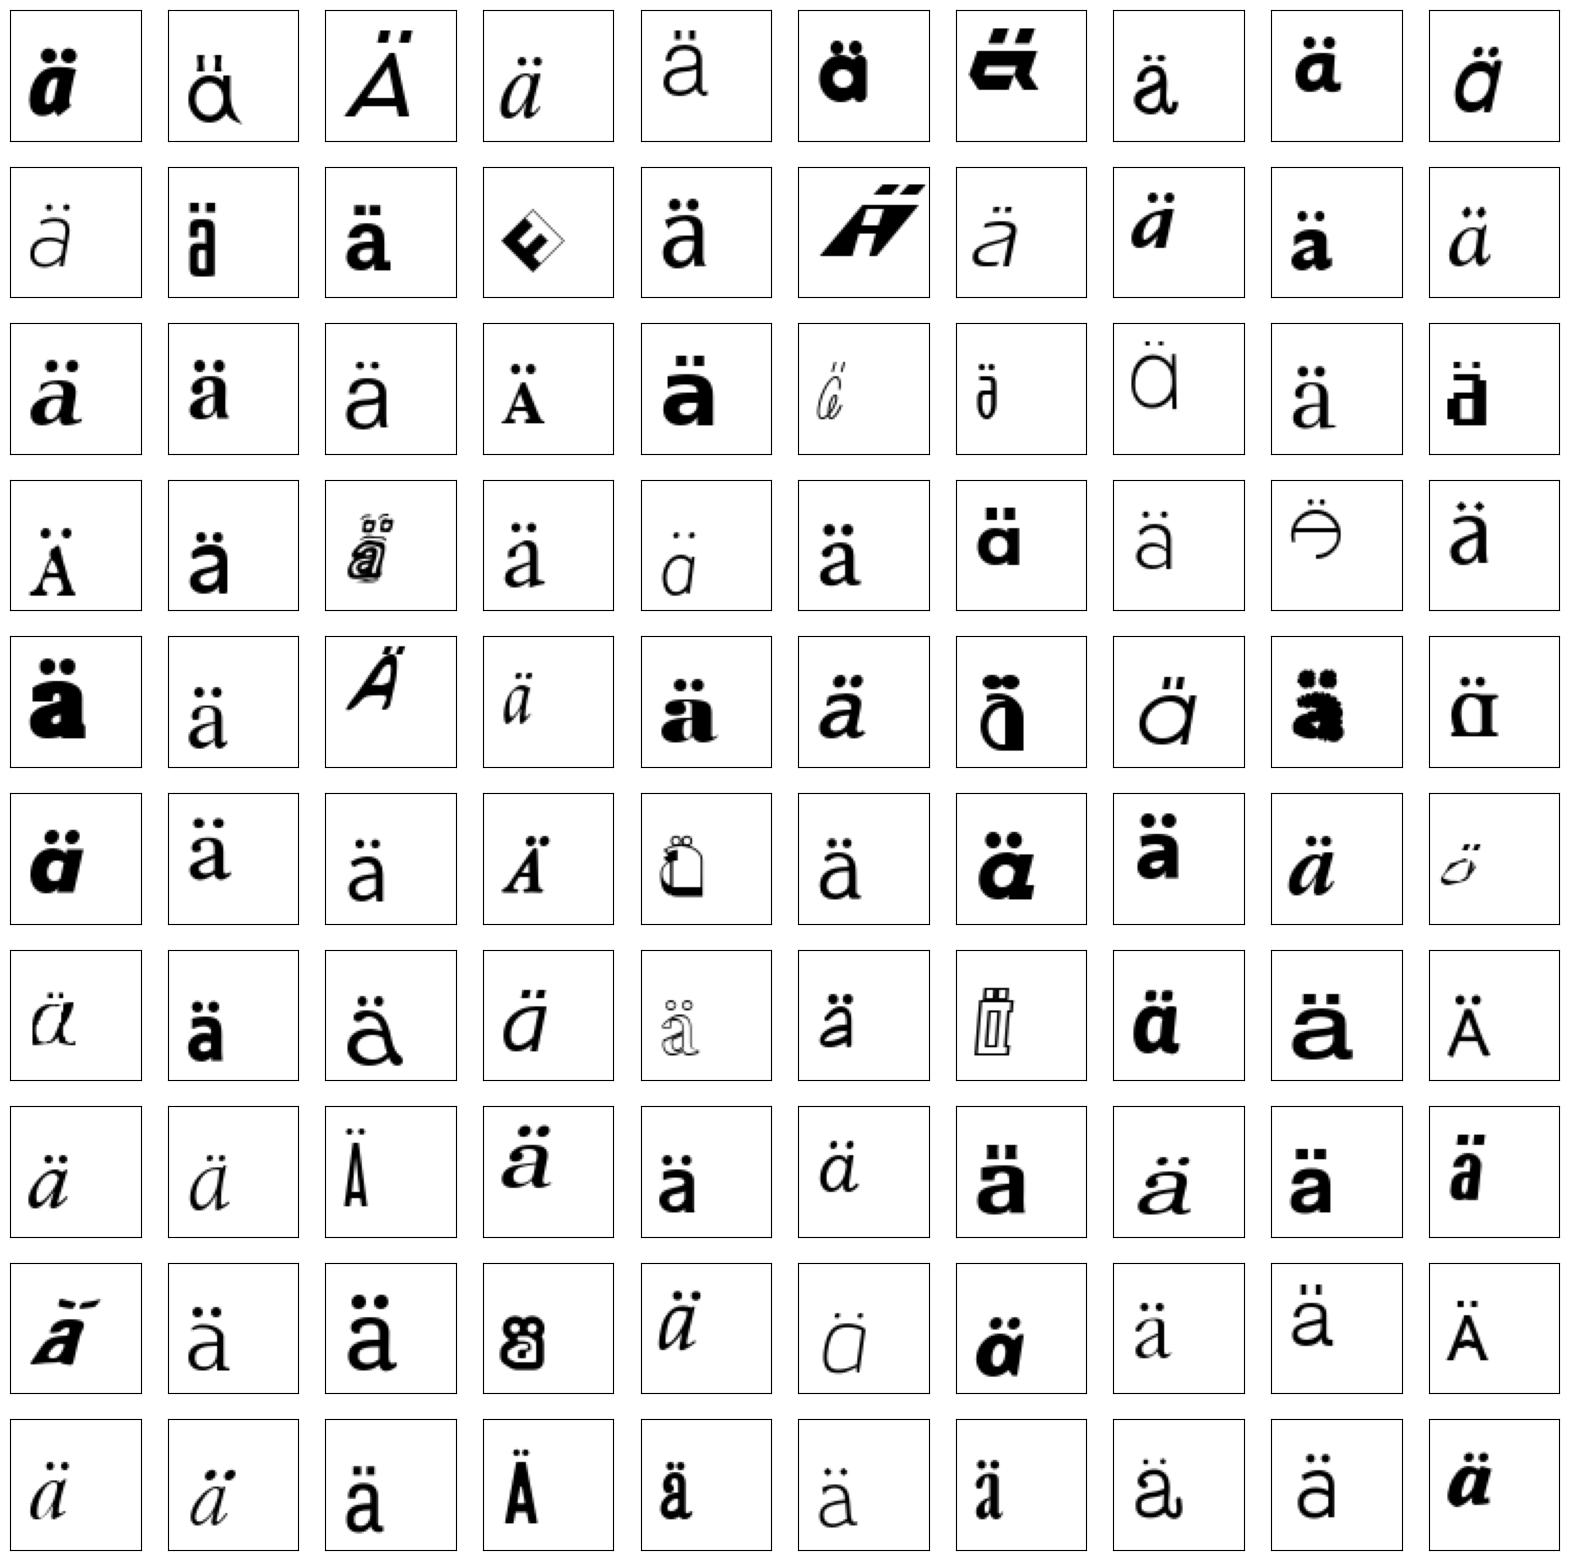

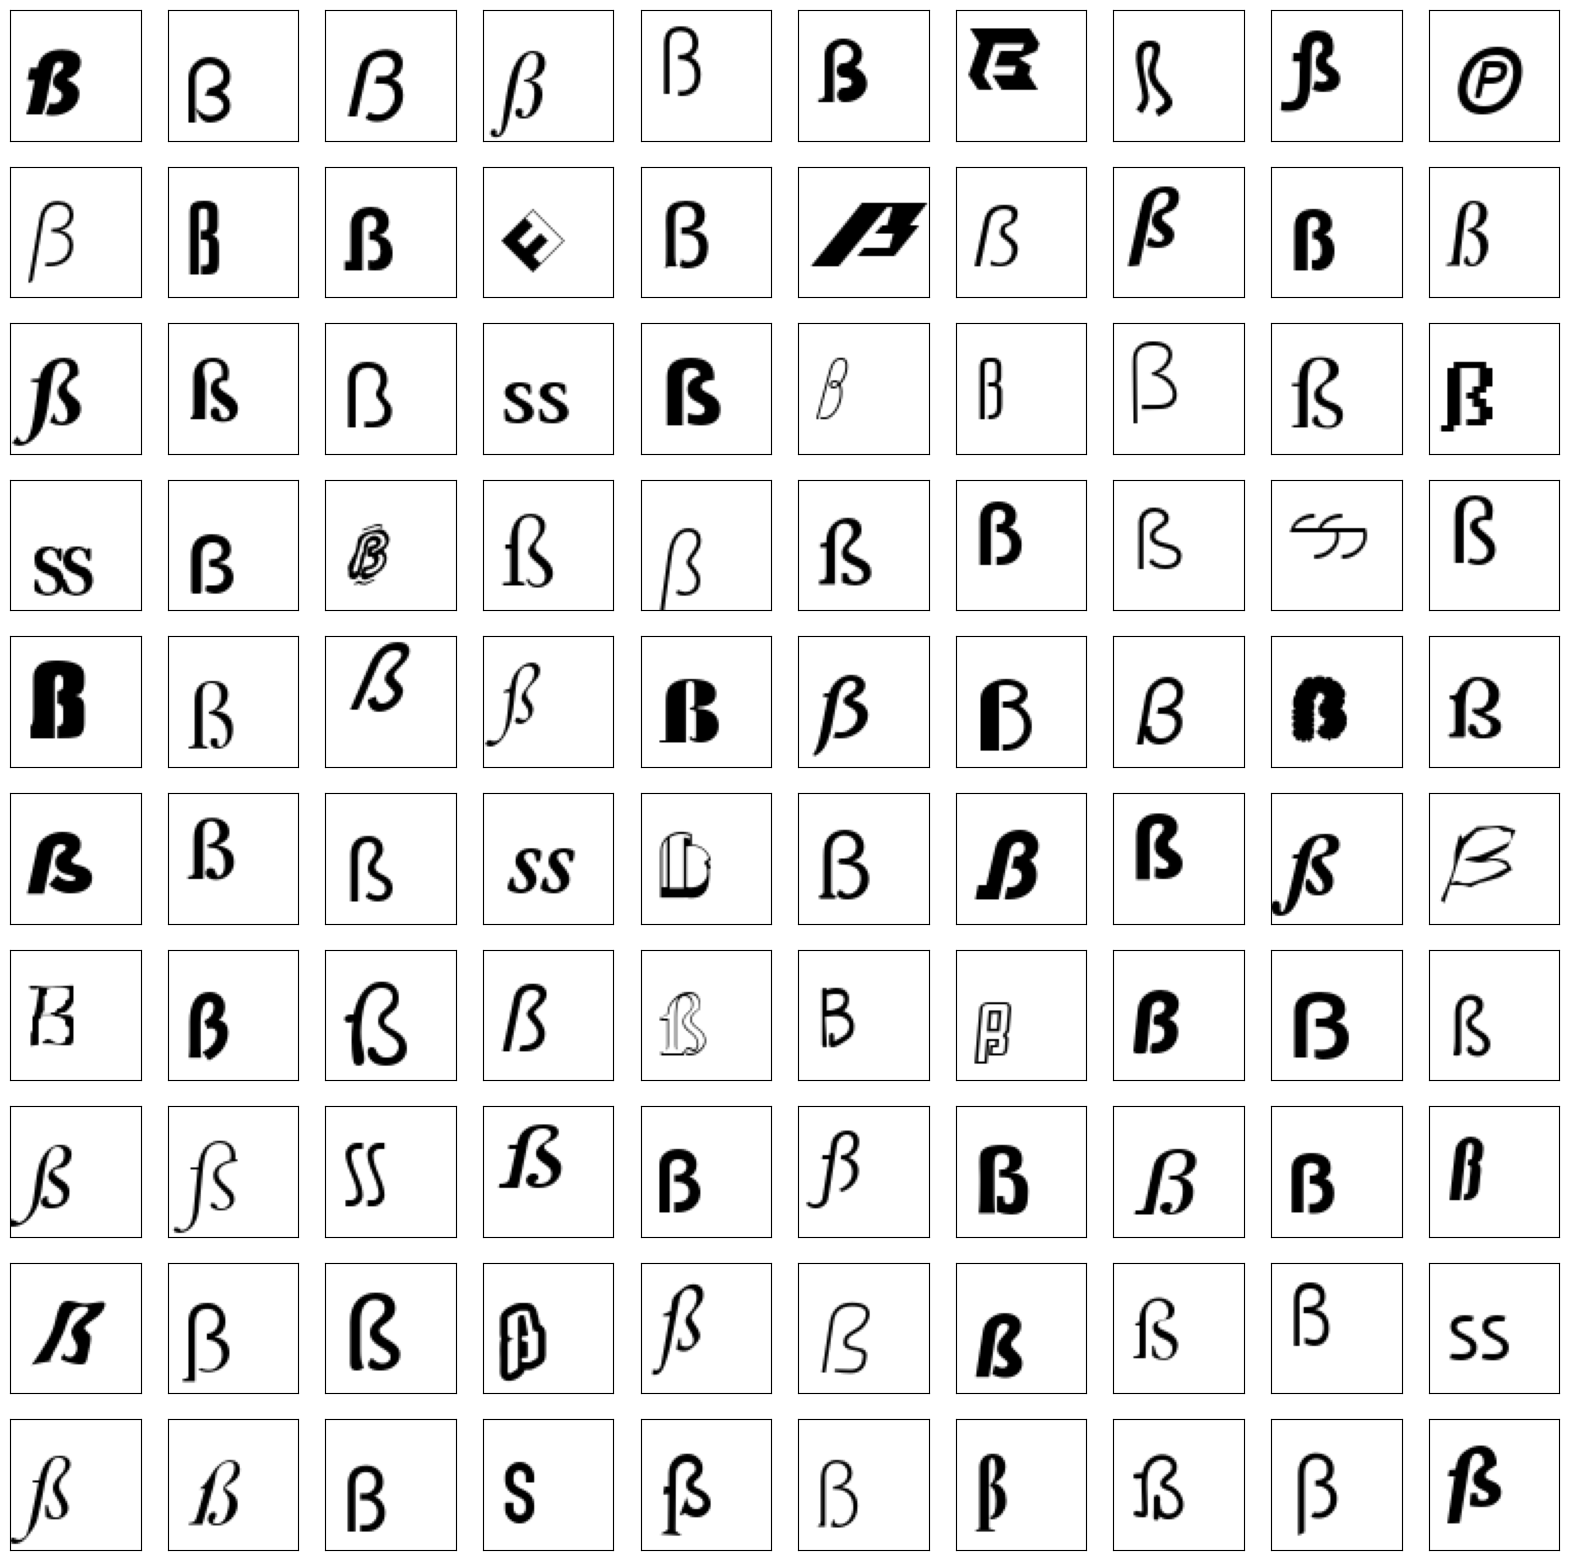

In [25]:
num_fonts = 10**2
# sampling num_fonts fonts from the list of font file names
#font_file_names_selection = np.random.choice(font_file_names, size=num_fonts, replace=False)
#font_file_path_selection = [os.path.join(path, font_file_name) for font_file_name in font_file_names_selection]

font_file_path_selection = np.random.choice(path_list, size=num_fonts, replace=False)

datarenderer.plot_glyphs(font_file_path_selection, 64, "AÄaäß")

Good things first:
- The script works, no additional errors
- The glyphs fit into the bounding box

Now the other things:
- There are a few fonts with weird symbols instead of the correct glyph
- some fonts use capital letters instead of lowercase
- Not a small number of fonts use "ss" instead of "ß"

We have to see, if we need to fix this. One idea is, to make an embedding of glyphs for a specific character and then find the outliers.

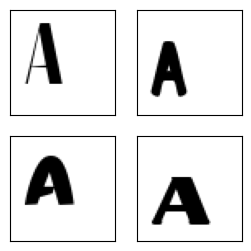

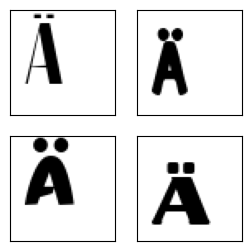

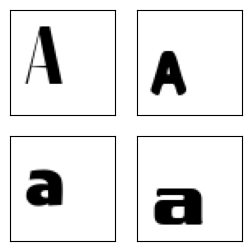

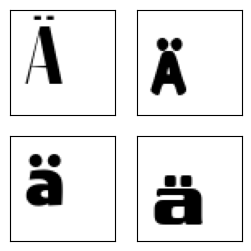

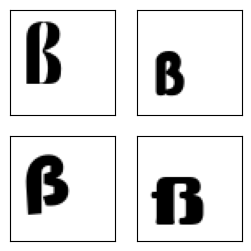

In [26]:
num_fonts = 2**2
# sampling num_fonts fonts from the list of font file names
#font_file_names_selection = np.random.choice(font_file_names, size=num_fonts, replace=False)
#font_file_path_selection = [os.path.join(path, font_file_name) for font_file_name in font_file_names_selection]

font_file_path_selection = np.random.choice(path_list, size=num_fonts, replace=False)

datarenderer.plot_glyphs(font_file_path_selection, 64, "AÄaäß", figsize=(3, 3))

## Selecting good fonts with a "ß"

In [30]:
def find_garbage():
    num_fonts = 5**2
    # sampling num_fonts fonts from the list of font file names
    # font_file_names_selection = np.random.choice(font_file_names, size=num_fonts, replace=False)
    # font_file_path_selection = [os.path.join(path, font_file_name) for font_file_name in font_file_names_selection]

    font_file_path_selection = np.random.choice(path_list, size=num_fonts, replace=False)
    datarenderer.plot_glyphs(font_file_path_selection, 64, "ß", show_index=True, figsize=(7, 7))
    return font_file_path_selection


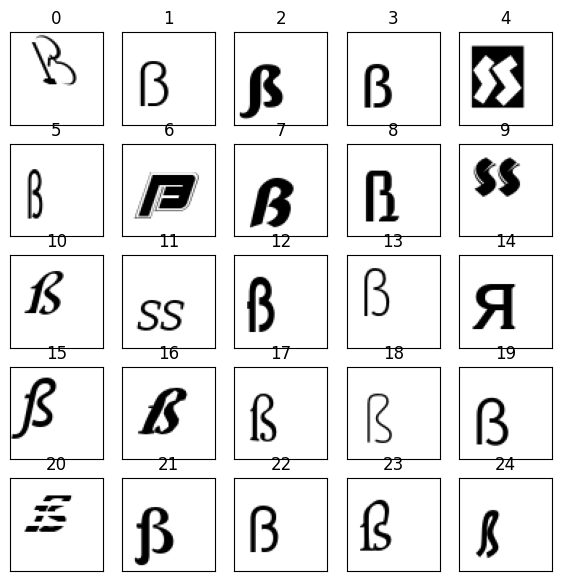

In [31]:
font_file_names_selection = find_garbage()

In [32]:
#error

file_name_selection = "font_file_names_good_ß_2.txt"
# index of the garbage fonts in the picture above
idx_garbage = [2, 9, 7, 11, 23]
idx_all = np.arange(len(font_file_names_selection))
idx_selection = np.setdiff1d(idx_all, idx_garbage)
fonts_wo_garbage = [font_file_names_selection[i] for i in idx_selection]
# create file if not exist
open(file_name_selection, 'a').close()
# appending the file names of the good fonts to the file
# if the file does not exist, it will be created
with open(file_name_selection, "r") as f:
    font_file_names_in_file = f.read().splitlines()
with open(file_name_selection, "a") as f:
    for font_file_name in fonts_wo_garbage:
        if font_file_name not in font_file_names_in_file:
            f.write(font_file_name + "\n")

NameError: name 'error' is not defined